# Project: Investigation of Movie Dataset (TMDB Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

> ### Overview
This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|)characters.

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
# Data Wrangling

### Assessing Data

Let's first read the data and start investigating.

In [80]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Quickly check the dataframe,

In [81]:
# Data Shape
print('Features:')
print('Number of samples in the list is {}'.format(df.shape[0]))
print('Number of features in the list is {} \n'.format(df.shape[1]))

Features:
Number of samples in the list is 10866
Number of features in the list is 21 



In [82]:
# Number of non-null unique values and data types for each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [83]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

> ### Outlines from the Dataset
1) We need to remove the unused columns <br>
2) We must remove the duplicated rows.<br>
3) Data types should be changed in "budget, revenue, release_date" columns <br>
4) Some of the movies has zero budget or zero revenue, which means we need to replace  their values <br>
5) There isn't any given currency, so I'll take it as dollar.  <br>
6) vote_count is different in every movie <br>
7) 'Runtime' column has missing/zero values <br>

#### 1) Dropping extraneous columns

In [84]:
df_edited = df.drop(columns = ['id','imdb_id','popularity','homepage','tagline','overview','budget_adj','revenue_adj'])

In [85]:
df_edited.head(3)

,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015


#### 2) We must remove the duplicated rows.

In [86]:
# Duplicates
print('Is there any duplicate data?')
print(df_edited.duplicated().value_counts())

# Dropping Duplicates
df_edited.drop_duplicates(inplace=True)
print('\n' + 'After dropping duplicates:')
print(df_edited.duplicated().value_counts())

Is there any duplicate data?
False    10865
True         1
dtype: int64

After dropping duplicates:
False    10865
dtype: int64


#### 3) Release Date data type should be changed

In [87]:
df_edited['release_date'] = pd.to_datetime(df_edited['release_date'])
df_edited['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

#### 4) Some of the movies has zero budget or zero revenue, which means we need to replace  their values, as well as runtime column with mean of the corresponding column

In [88]:
df_edited[['runtime','budget','revenue']].describe()

,runtime,budget,revenue
count,10865.000000,1.086500e+04,1.086500e+04
mean,102.071790,1.462429e+07,3.982690e+07
std,31.382701,3.091428e+07,1.170083e+08
min,0.000000,0.000000e+00,0.000000e+00
25%,90.000000,0.000000e+00,0.000000e+00
50%,99.000000,0.000000e+00,0.000000e+00
75%,111.000000,1.500000e+07,2.400000e+07
max,900.000000,4.250000e+08,2.781506e+09


In [89]:
names =['runtime','budget','revenue']

In [90]:
for i in names:
    df_edited[i].replace(0, df_edited[i].mean(), inplace=True)


In [91]:
df_edited[['runtime','budget','revenue']].describe()

,runtime,budget,revenue
count,10865.000000,1.086500e+04,1.086500e+04
mean,102.363021,2.229110e+07,6.187923e+07
std,30.904043,2.801385e+07,1.110236e+08
min,2.000000,1.000000e+00,2.000000e+00
25%,90.000000,1.462429e+07,3.982690e+07
50%,99.000000,1.462429e+07,3.982690e+07
75%,111.000000,1.500000e+07,3.982690e+07
max,900.000000,4.250000e+08,2.781506e+09


#### 5) There isn't any given currency, so I'll take it as dollar. 

#### 7) Check the columns has missing/zero values

In [92]:
# Features with missing values
print('Features with missing values:')
df_edited.isnull().sum()

Features with missing values:


budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [93]:
print('Filling empty information')
df_edited.fillna('Unknown', inplace = True)
df_edited.isnull().sum()

Filling empty information


budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [94]:
df_edited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
budget                  10865 non-null float64
revenue                 10865 non-null float64
original_title          10865 non-null object
cast                    10865 non-null object
director                10865 non-null object
keywords                10865 non-null object
runtime                 10865 non-null float64
genres                  10865 non-null object
production_companies    10865 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 1.2+ MB


In [95]:
# Checking Final Dataframe before Visualization
df_edited.duplicated().value_counts()

False    10865
dtype: int64

Saving dataframe with different name for easy access.

In [96]:
movies = df_edited

Defining a function to remove seperators and count unique values in specific column

In [97]:
def tmdb(column):
    #Take a column and separate the string in it by '|'
    data = movies[column].str.cat(sep = '|')
    data = pd.Series(data.split('|'))
    count = data.value_counts(ascending = False)
    return count

In [98]:
genre_count = tmdb('genres')
print('Genre counts in the dataset')
genre_count.head(10)

Genre counts in the dataset


Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
dtype: int64

In [99]:
cast_count =  tmdb('cast')[1:]
print('Highest Number of movies that Actors/Acteresses played')
cast_count.head(10)

Highest Number of movies that Actors/Acteresses played


Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
Robin Williams       51
John Cusack          50
John Goodman         49
Morgan Freeman       49
Liam Neeson          48
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Replace this header name!)

Calculating the net profit for each movie

In [100]:
movies.insert(2,'net_profit',movies['revenue']-movies['budget'])
movies.head()

,budget,revenue,net_profit,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,110000000.0,2.952382e+08,1.852382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,200000000.0,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,190000000.0,1.506249e+09,1.316249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


### Movies with higher return of investment and high net profit, can be considered successful in an economic way. I prefered %300 ROI and over $75M Net Profit for selecting profitted movies.

In [101]:
movies['roi'] = movies['revenue'] / movies['budget']
profitted_movies = movies[(movies['roi'] >= 3) &  (movies['net_profit'] > 75000000)]
profitted_movies.index = range(len(profitted_movies))
profitted_movies.index = profitted_movies.index + 1

profitted_movies.head(3)

,budget,revenue,net_profit,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,roi
1,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,10.090192
2,200000000.0,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,10.340891
3,190000000.0,1.506249e+09,1.316249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,7.927628


In [102]:
profitted_movies.describe()

,budget,revenue,net_profit,runtime,vote_count,vote_average,release_year,roi
count,8.140000e+02,8.140000e+02,8.140000e+02,814.000000,814.000000,814.000000,814.000000,8.140000e+02
mean,5.321713e+07,3.090333e+08,2.558162e+08,115.264128,1269.662162,6.524570,2001.201474,1.289507e+03
std,5.085125e+07,2.710771e+08,2.328832e+08,29.660652,1377.175463,0.686676,11.366799,3.570579e+04
min,1.130000e+02,7.886851e+07,7.501105e+07,72.000000,10.000000,4.500000,1961.000000,3.000248e+00
25%,1.800000e+07,1.371482e+08,1.115434e+08,98.000000,357.500000,6.000000,1994.000000,4.092301e+00
50%,3.700000e+07,2.123950e+08,1.695363e+08,112.000000,742.000000,6.500000,2004.000000,5.861885e+00
75%,7.000000e+07,3.630593e+08,3.040656e+08,127.000000,1706.000000,7.000000,2011.000000,9.415370e+00
max,3.000000e+08,2.781506e+09,2.544506e+09,705.000000,9767.000000,8.300000,2015.000000,1.018619e+06


In [103]:
print('Our dataset reduced from {} movies to {} movies'. format(movies.shape[0],profitted_movies.shape[0]))

Our dataset reduced from 10865 movies to 814 movies


### Question 1: Is runtime of a movie related with success?

In [104]:
print('Average runtime of a movie is {} minutes'.format(movies['runtime'].mean().astype(int)))

Average runtime of a movie is 102 minutes


>Check this information with detailed graphs.

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


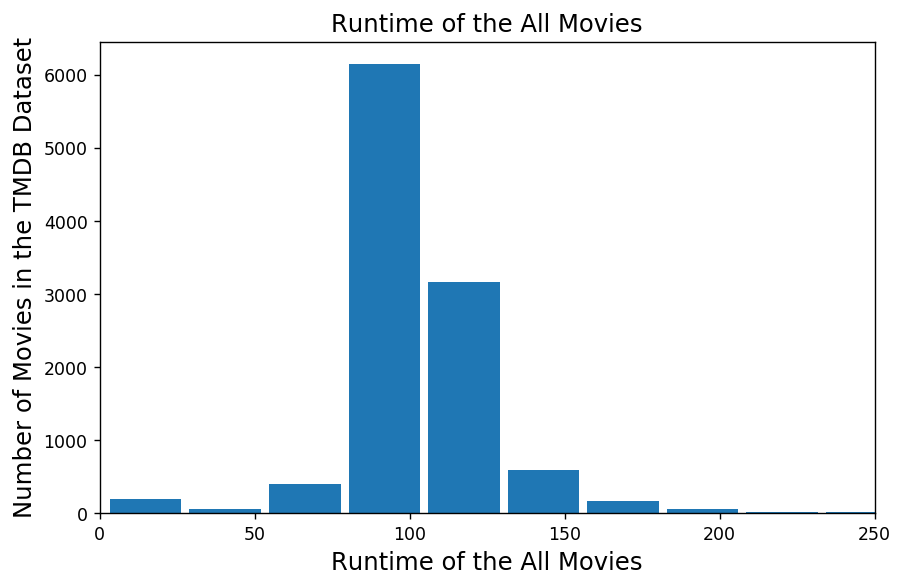

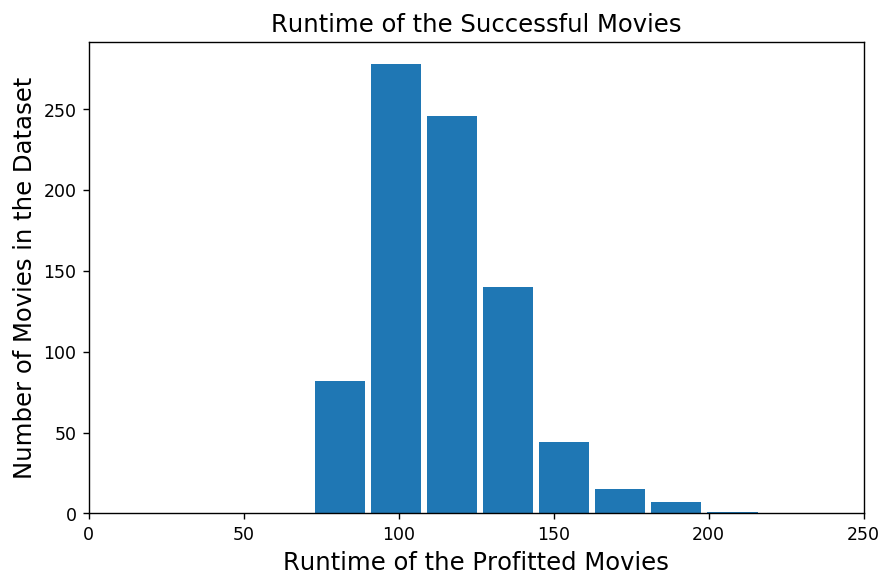

In [105]:
# Plotting the Runtime of the Profitted Movies
f = plt.figure(1) ;
plt.figure(figsize=(8,5), dpi = 125)
plt.xlabel('Runtime of the All Movies', fontsize = 14)
plt.ylabel('Number of Movies in the TMDB Dataset', fontsize = 14)
plt.title('Runtime of the All Movies', fontsize = 14)
plt.xlim(0,250)
plt.hist(movies['runtime'],rwidth=0.9, bins=35)
f.show()

g = plt.figure(1);
plt.figure(figsize=(8,5), dpi = 125)
plt.xlabel('Runtime of the Profitted Movies', fontsize = 14)
plt.ylabel('Number of Movies in the Dataset', fontsize = 14)
plt.title('Runtime of the Successful Movies', fontsize = 14)
plt.xlim(0,250)
plt.hist(profitted_movies['runtime'],rwidth=0.9, bins=35)
g.show()



>We can clearly say that figure is are right skewed. Both Profitted Movies and overall all movies have runtime between 80 to 120. Let's see more clearly:

In [106]:
profitted_movies['runtime'].describe()

count    814.000000
mean     115.264128
std       29.660652
min       72.000000
25%       98.000000
50%      112.000000
75%      127.000000
max      705.000000
Name: runtime, dtype: float64

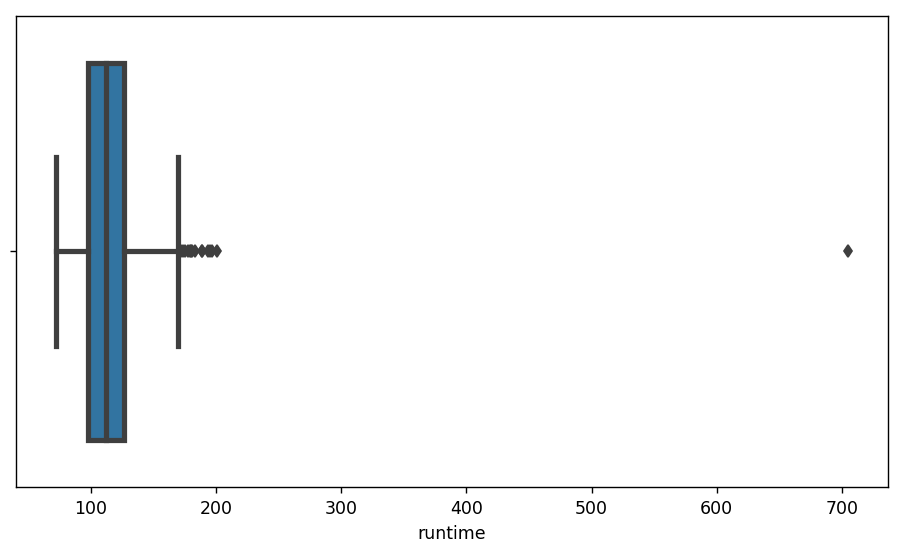

In [107]:
import seaborn as sns

plt.figure(figsize=(9,5), dpi = 125)
sns.boxplot(profitted_movies['runtime'], linewidth = 3)
plt.show()

>There is one outlier movie with over 700 minutes. Let's remove and check this chart again.

In [108]:
profitted_movies = profitted_movies[profitted_movies['runtime']<400]

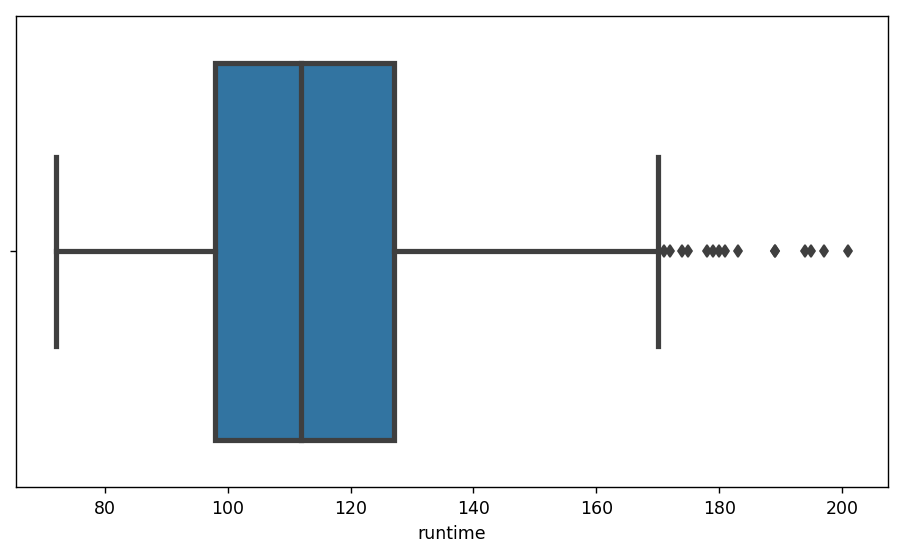

In [109]:
plt.figure(figsize=(9,5), dpi = 125)
sns.boxplot(profitted_movies['runtime'], linewidth = 3)
plt.show()

The generated above give a visual of complete distribution of runtime of profitted movies. We can conclude these informations by looking both scatter and box plots:

- Mean of the movies is 115 minutes. <br>
- 25% of movies have a runtime of less than 98 minutes. <br>
- 50% of movies have a runtime of less than 112 minutes. (median) <br>
- 75% of movies have a runtime of less than 127 minutes. 

### Question 2: Is there any relation between release year of the movie and success?

In [110]:
profitted_movies['release_year'].describe()

count     813.000000
mean     2001.201722
std        11.373794
min      1961.000000
25%      1994.000000
50%      2004.000000
75%      2011.000000
max      2015.000000
Name: release_year, dtype: float64

In [111]:
profitted_movies['release_year'].value_counts()[0:10]

2014    48
2012    42
2015    40
2013    39
2011    38
2004    34
2007    33
2010    30
2009    29
2003    29
Name: release_year, dtype: int64

>Most profitted movies released on 2014

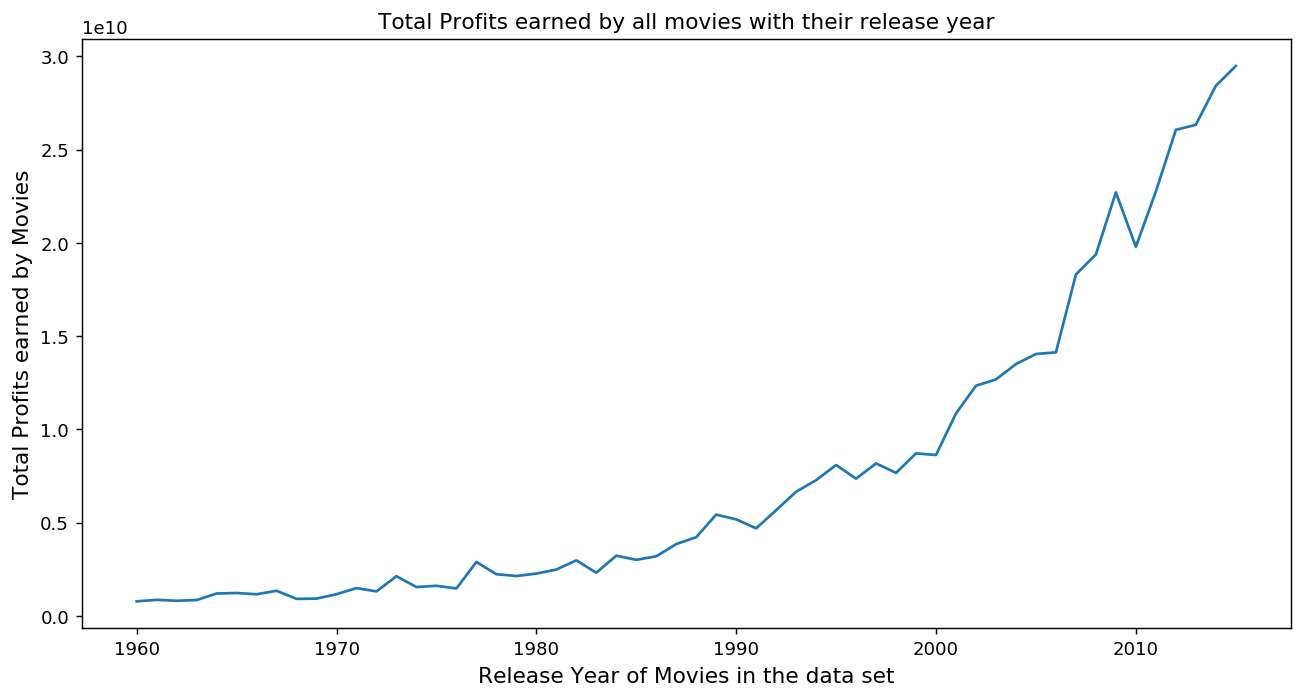

In [112]:
profit_year = movies.groupby('release_year')['net_profit'].sum()

plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
plt.ylabel('Total Profits earned by Movies', fontsize = 12)
plt.title('Total Profits earned by all movies with their release year')
plt.plot(profit_year)

plt.show()

>We can say that year by year, except 2008-2010, net profit increases in all movies. Movie industry increases all around the world with huge amount of profits.

In [113]:
profit_year.idxmax()

2015

>To sum up, we can conclude both graphically as well as by calculations, year 2015 was the year where movies made the highest net profit. 

### Let's check the characteristics of the profitted movies

In [114]:
def succeed_movies(column):
    data = profitted_movies[column].str.cat(sep = '|')
    data = pd.Series(data.split('|'))
    count = data.value_counts(ascending = False)
    return count

### Research Question 3: What are the Most Successfull and Most Frequent Casts 

In [115]:
succeed_cast = succeed_movies('cast')[1:]
print('Successful Movie Casts')
succeed_cast.head(20)

Successful Movie Casts


Tom Hanks             17
Harrison Ford         14
Brad Pitt             14
Sylvester Stallone    14
Julia Roberts         13
Bruce Willis          13
Robin Williams        12
Jim Carrey            12
Samuel L. Jackson     12
Sandra Bullock        12
Robert De Niro        12
Anne Hathaway         11
Will Smith            11
Leonardo DiCaprio     11
Cameron Diaz          11
Dustin Hoffman        11
Eddie Murphy          10
Mel Gibson            10
Ben Stiller           10
Matt Damon            10
dtype: int64

In [116]:
freq_cast = tmdb('cast')[1:]
print('Most Frequent Casts')
freq_cast.head(20)

Most Frequent Casts


Robert De Niro        72
Samuel L. Jackson     71
Bruce Willis          62
Nicolas Cage          61
Michael Caine         53
Robin Williams        51
John Cusack           50
John Goodman          49
Morgan Freeman        49
Liam Neeson           48
Susan Sarandon        48
Alec Baldwin          47
Julianne Moore        47
Johnny Depp           46
Tom Hanks             46
Christopher Walken    46
Gene Hackman          46
Sylvester Stallone    45
Willem Dafoe          45
Dennis Quaid          45
dtype: int64

### Research Question 4: Most Successfull Genres

In [117]:
succeed_genre_count = succeed_movies('genres')
succeed_genre_count.head(10)

Comedy             320
Drama              300
Action             257
Thriller           223
Adventure          220
Romance            147
Family             139
Science Fiction    112
Crime              107
Fantasy            104
dtype: int64

##### Lets plot the points in descending order top to bottom in the horizontal bar graph for better  visualization

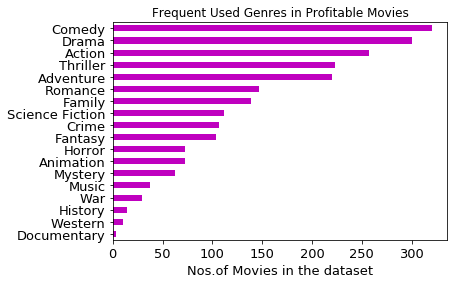

In [118]:
succeed_genre_count.sort_values(ascending = True, inplace = True)

genre_plot = succeed_genre_count.plot(kind = 'barh', color = 'm', fontsize = 13)
genre_plot.set(title = 'Frequent Used Genres in Profitable Movies')
genre_plot.set_xlabel('Nos.of Movies in the dataset', color = 'black', fontsize = '13')
plt.figure(figsize=(12,6), dpi = 130)

plt.show();


### Research Question 5: Most Used Keywords in the Popular Movies

In [119]:
used_keywords = succeed_movies('keywords')[1:]
used_keywords.head(10)

duringcreditsstinger         25
london                       25
dystopia                     23
sequel                       21
musical                      19
spy                          17
saving the world             15
wife husband relationship    15
paris                        14
england                      14
dtype: int64

### Research Question 6: Average Runtime Duration of the Movies by Year

In [120]:
import numpy as np
import matplotlib.pyplot as plt

#Groupby by Years
movie_years = movies.groupby([movies['release_date'].dt.year.rename('Year')])['runtime'].mean().reset_index()
succ_movie_years = profitted_movies.groupby([profitted_movies['release_date'].dt.year.rename('Year')])['runtime'].mean().reset_index()

In [121]:
print('Average runtime of the global movie dataset is {} minutes, whereas successful movies has slightly longer runtime with {} minutes'.format(movie_years['runtime'].mean().astype(int),succ_movie_years['runtime'].mean().astype(int)))

Average runtime of the global movie dataset is 105 minutes, whereas successful movies has slightly longer runtime with 116 minutes


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


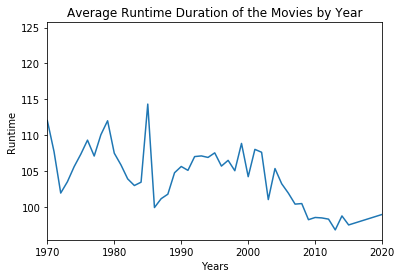

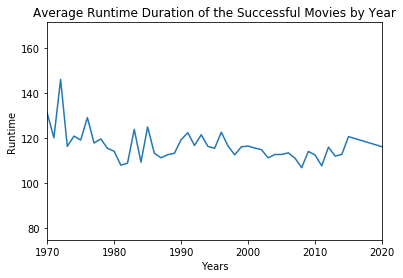

In [122]:
f = plt.figure(1)
plt.plot(movie_years['Year'],movie_years['runtime'])
plt.xlabel('Years')
plt.ylabel('Runtime')
plt.xlim(1970,2020)
plt.title('Average Runtime Duration of the Movies by Year')
f.show()

g = plt.figure(2)
plt.plot(succ_movie_years['Year'],succ_movie_years['runtime'])
plt.xlabel('Years')
plt.ylabel('Runtime')
plt.xlim(1970,2020)
plt.title('Average Runtime Duration of the Successful Movies by Year')
g.show()


> By looking the graph above, runtimes slightly decreased over the years.

<a id='conclusions'></a>
## Conclusions

####  For a Successful Movie: 
    
1. Average Budget must be around 50-55 millon dollar at least.
2. Average duration of the movie should be at least 114 minutes.
3. Top 10 must have cast:
    Tom Cruise
    Brad Pitt          
    Harrison Ford      
    Sylvester Stallone 
    Julia Roberts      
    Bruce Willis       
    Sandra Bullock 
    Robin Williams     
    Samuel L. Jackson
    Jim Carrey           
4. Genre should be one of these: <br>
    <b>Comedy, Drama, Action, Thriller, Adventure, Romance</b>
5. Characteristic Features:
    - The story of the film should include some <b> dystopia, spy and saving the world story </b> if genre is <b> Action and adventure </b>. If movie genre is <b>Romance</b>, it should be better <b>musical</b> with influence on <b>wife husband relationship</b>. <br>
    - Gets better if it's a sequel. <br>
    - Movies with post-credit scenes stands out more.
        
#### A movie that provides these features is likely to have at least %300 Return of investment and generate an average of $ 300 million in revenue.

#### Additional Notes:
This analysis was done considering the movies which had a net profit of 75 million dollar or more. It may not be absolutely error-free, but by following this recommendation one can increase the likelihood of a movie being a success. Furthermore,we are not sure if the data we receive is completely correct and up to date.
Also, as stated before the budget and revenue column may not have a currency unit and it could be possible to have different budget films in different currencies depending on the country that made.

In [123]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0